In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.drop(['CustomerID', 'Genre', 'Age'], axis=1, inplace=True)

In [5]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(2)
memory usage: 3.2 KB


In [7]:
import seaborn as sns

/home/raghav/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


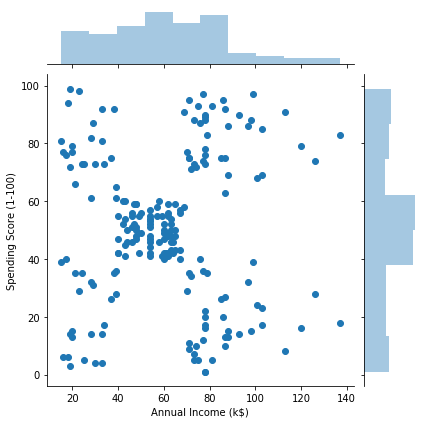

In [8]:
sns.jointplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = data)

In [9]:
from sklearn.cluster import KMeans

In [38]:
kmeans = KMeans(n_clusters=2, init = "k-means++")
kmeans.fit(data)
kmeans.inertia_

181363.59595959596

In [39]:
wcss  = []
for i in range(1,11):
    k = KMeans(n_clusters=i)
    k.fit(data)
    wcss.append(k.inertia_)

In [40]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30552.71402546729,
 25022.485004530354,
 21850.165282585633,
 19636.753964898147]

In [41]:
import matplotlib.pyplot as plt

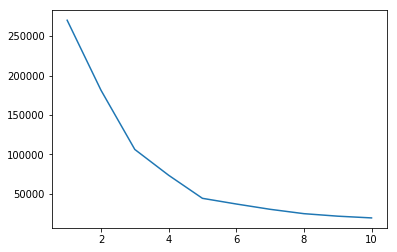

In [42]:
plt.plot(range(1,11), wcss)

In [43]:
k  = KMeans(n_clusters=5, init = "k-means++")
ykmeans = k.fit_predict(data)

In [44]:
ykmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

In [30]:
X = data.values

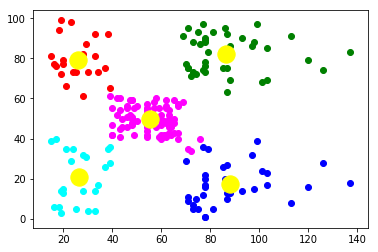

In [37]:
plt.scatter(X[ykmeans==0,0],X[ykmeans==0,1], c = 'red')
plt.scatter(X[ykmeans==1,0],X[ykmeans==1,1], c = 'blue')
plt.scatter(X[ykmeans==2,0],X[ykmeans==2,1], c = 'green')
plt.scatter(X[ykmeans==3,0],X[ykmeans==3,1], c = 'cyan')
plt.scatter(X[ykmeans==4,0],X[ykmeans==4,1], c = 'magenta')
plt.scatter(centroid[:,0], centroid[:,1], c = 'yellow', s = 300)

In [36]:
centroid = k.cluster_centers_